# Business Performance Analysis.

**Project Description**

The entertainment application has been suffering losses over the past few months despite significant investments in advertising. The goal is to identify the causes and help the company turn a profit.

**Data**

There is data on users acquired from May 1 to October 27, 2019:
- server log with data on their visits,
- records of their purchases during this period,
- advertising expenses.

**Data Description**

Files:
- _`visits_info_short.csv`_ — contains the server log with information on site visits,
- _`orders_info_short.csv`_ — contains information on orders,
- _`costs_info_short.csv`_ — contains information on advertising expenses.

Structure of _visits_info_short.csv_:
- User Id — unique identifier of the user,
- Region — user's country,
- Device — type of user device,
- Channel — identifier of the referral source,
- Session Start — date and time of session start,
- Session End — date and time of session end.

Structure of _orders_info_short.csv_:
- User Id — unique identifier of the user,
- Event Dt — date and time of the purchase,
- Revenue — order amount.

Structure of _costs_info_short.csv_:
- dt — date of the advertising campaign,
- Channel — identifier of the advertising source,
- costs — expenses for the campaign.

**Need to investigate**

- where the users come from and which devices they use,
- the cost of user acquisition from various advertising channels,
- how much revenue each customer generates,
- when the customer acquisition costs are recouped,
- which factors hinder user acquisition.

**Research Objectives**
- Identify the reasons for the inefficiency of user acquisition.
- Provide recommendations for the marketing department.

**Research Plan**
 1. Data overview.
 2. Data preprocessing.
 3. Define functions to output business metrics.
 4. General exploratory data analysis.
 5. Marketing metrics analysis.
 6. Advertising payback evaluation.
 7. Conclusions.

### Data overview.

In [1]:
# We import all the necessary libraries in this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# visits = pd.read_csv('visits_info_short.csv')
# orders = pd.read_csv('orders_info_short.csv')
# costs = pd.read_csv('costs_info_short.csv')

try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('https://.../datasets/visits_info_short.csv')
    orders = pd.read_csv('https://.../datasets/orders_info_short.csv')
    costs = pd.read_csv('https://.../datasets/costs_info_short.csv')

In [3]:
# Let's create a list with the names of the variables in which the dataframes have been saved.
# We will use it in the loop for the convenience of reviewing the data.
list_df = [visits, orders, costs]

In [4]:
n = 1
for df in list_df:
    print('\033[34m\033[1m\033[4m df {} \033[0m'.format(n))
    print(df.head(5))
    n += 1

 df 1 
        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
 df 2 
        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
 df 3 
           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBo

In [5]:
# Let's check for missing values
n = 1
for df in list_df:
    print('\033[34m\033[1m\033[4m df {} \033[0m'.format(n))
    print(df.isnull().sum())
    n += 1

 df 1 
User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64
 df 2 
User Id     0
Event Dt    0
Revenue     0
dtype: int64
 df 3 
dt         0
Channel    0
costs      0
dtype: int64


There are no missing values.

In [6]:
# Let's get acquainted with the data type
n = 1
for df in list_df:
    print('\033[34m\033[1m\033[4m df {} \033[0m'.format(n))
    print(df.info())
    n += 1

 df 1 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
 df 2 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
 df 3 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (t

The dates in all dataframes will be converted to the "datetime" value in the next Preprocessing step.

In [7]:
# let's check for obvious duplicates
n = 1
for df in list_df:
    print('\033[34m\033[1m\033[4m df {} \033[0m'.format(n))
    print(df.duplicated().sum())
    n += 1

 df 1 
0
 df 2 
0
 df 3 
0


There are no obvious duplicates

We will check for implicit duplicates at the Preprocessing step after correcting the column names

In [8]:
print(visits['Region'].sort_values().unique())

['France' 'Germany' 'UK' 'United States']


In [9]:
visits['Device'].sort_values().unique()

array(['Android', 'Mac', 'PC', 'iPhone'], dtype=object)

### Data preprocessing.

#### Improving style and readability

In [10]:
# Let's change the name of the columns, reduce them to lowercase and remove unnecessary spaces if any
n = 1
for df in list_df:
    print('\033[34m\033[1m\033[4m df {} \033[0m'.format(n))
    print(df.columns)
    n += 1

 df 1 
Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')
 df 2 
Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')
 df 3 
Index(['dt', 'Channel', 'costs'], dtype='object')


In [11]:
# Let's bring it to the lower case. Replace the existing spaces with underscores. There are no extra spaces to delete.
for df in list_df:
    df.columns = df.columns.str.lower().str.replace(' ', '_')

In [12]:
# Let's check the result
n = 1
for df in list_df:
    print('\033[34m\033[1m\033[4m df {} \033[0m'.format(n))
    print(df.columns)
    n += 1

 df 1 
Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
 df 2 
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
 df 3 
Index(['dt', 'channel', 'costs'], dtype='object')


#### Checking for non-obvious duplicates and, if necessary, deleting them

In [13]:
# let's check for implicit duplicates of the 'region','device', 'channel' column of the "visits" dataframe
check_col = ['region', 'device', 'channel']
for col in check_col:
    print('\033[34m\033[4m Unique values for columne:\033[1m\033[4m {} \033[0m'.format(col))
    print(visits[col].sort_values().unique())
    print()

 Unique values for columne: region 
['France' 'Germany' 'UK' 'United States']

 Unique values for columne: device 
['Android' 'Mac' 'PC' 'iPhone']

 Unique values for columne: channel 
['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds'
 'organic']



In [14]:
# let's check the 'channel' column of the "costs" dataframe for implicit duplicates
print(costs['channel'].sort_values().unique())

['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds']


No implicit duplicates have been identified

#### Changing data types

In [15]:
# let's check the data in the columns with the date to the datetime type
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

### Define functions to output business metrics.

#### Functions for calculating metric values:

- `get_profiles()` — for creating user profiles,
- `get_retention()` — for calculating the Retention Rate,
- `get_conversion()` — for calculating conversion,
- `get_ltv()` — for calculating LTV.

In [16]:
# a function for creating user profiles

def get_profiles(sessions, orders, ad_costs):

# let's find the parameters of the first visits: sort the sessions by user ID and date of engagement, group them by ID
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for cohort analysis, we will determine the date of the first visit
    # and the first day of the month in which this visit took place
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # adding a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # counting the number of unique users
    # with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # let's combine spending on advertising and the number of attracted users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # we divide the advertising costs by the number of attracted users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # adding the cost of attraction to profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # The cost of attracting organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles # returning profiles from CAC


In [17]:
# function for calculating retention

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # adding the payer column to the dimensions list
    dimensions = ['payer'] + dimensions

    # let's exclude users who have not "lived up" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # we collect "raw" data to calculate retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # a function for grouping a table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # will get a retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # geting a table of retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # returning both tables and raw data
    return result_raw, result_grouped, result_in_time

In [18]:
# conversion calculation function

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # we exclude users who have not "lived up" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # we determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # adding data about purchases in the profile
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculating the lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # grouping by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # a function for grouping a table by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each "cell" in a row by the size of the cohort
        # and we get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get the conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for the conversion dynamics table, we remove 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # get a table of conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both tables and raw data
    return result_raw, result_grouped, result_in_time

In [19]:
# function for calculating LTV and ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # let's exclude users who have not "lived up" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # adding data about purchases in the profile
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculate the user's lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # we group by cohort if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # the function of grouping by desired attributes
    def group_by_dimensions(df, dims, horizon_days):
        # building a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # find the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
        # calculate the size of the cohorts
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # combine the cohort sizes and the revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # counting LTV: divide each "cell" in a row by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
        # we exclude all lifetimes exceeding the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restoring cohort sizes
        result['cohort_size'] = cohort_sizes

        # collect a dataframe with user data and CAC values,
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculate the average CAC according to the parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # counting ROI: dividing LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # deleting rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restoring the cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # adding CAC to the ROI table
        roi['cac'] = cac['cac']

        # in the final table, we leave the cohort sizes, CAC
        # and ROI in lifetimes that do not exceed the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # return the LTV and ROI tables
        return result, roi

    # get the LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for dynamics tables, we remove the 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # get tables of LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV table
        result_in_time,  # LTV dynamics table
        roi_grouped,  # ROI table
        roi_in_time,  # ROI dynamics table
    )

#### Functions for plotting:

- `filter_data()` — for smoothing the data,
- `plot_retention()` — for plotting the Retention Rate,
- `plot_conversion()` — for plotting the conversion rate,
- `plot_ltv_roi()` — for visualizing LTV and ROI.

In [20]:
# a function for smoothing the frame

def filter_data(df, window):
    # we apply a moving average for each column
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [21]:
# a function for visualizing retention

def plot_retention(retention, retention_history, horizon, window=7):

    # grid size for graphs
    plt.figure(figsize=(15, 10))

    # exclude cohort sizes and retention of the first day
    retention = retention.drop(columns=['cohort_size', 0])
    # leave only the necessary lifetime in the dynamics table
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if only payer is in the retention table indexes,
    # adding the second attribute — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # the graph table has two columns and two rows, four cells
    # in the first one, we build retention curves for paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Life Time')
    plt.title('Retention of paying users')

    # in the second cell, we build retention curves for non-paying customers
    # vertical axis — from the graph from the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Life Time')
    plt.title('Retention of non-paying users')

    # in the third cell, the dynamics of retention of payers
    ax3 = plt.subplot(2, 2, 3)
    # getting the column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filter the data and build a graph
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of attraction')
    plt.title(
        'Dynamics of retention of paying users on the {}-th day'.format(
            horizon
        )
    )

    # in the fourth cell, the dynamics of non—paying retention
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filter the data and build a graph
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Date of attraction')
    plt.title(
        'Dynamics of retention of non-paying users on the {}-th day'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [22]:
# a function for visualizing the conversion

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # setting the grid size for the graphs
    plt.figure(figsize=(15, 5))

    # exclude cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # leave only the necessary lifetime in the dynamics table
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # The first graph is conversion curves
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Life Time')
    plt.title('User Conversion rate')

    # The second graph is the conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # all columns of the index, except the date, will become columns of the pivot table
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of attraction')
    plt.title('The dynamics of user conversion on the {}-th day'.format(horizon))

    plt.tight_layout()
    plt.show()

In [23]:
# function for LTV and ROI visualization

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    # exclude cohort sizes from the ltv table
    ltv = ltv.drop(columns=['cohort_size'])
    # leave only the necessary lifetime in the ltv dynamics table
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # will record the cost of attraction in a separate frame
    cac_history = roi_history[['cac']]

    # exclude cohort sizes and cac from the roi table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # leave only the necessary lifetime in the roi dynamics table
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # The first graph is ltv curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Life Time')
    plt.title('LTV')

    # The second graph is the dynamics of ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # all columns of the index, except the date, will become columns of the pivot table
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of LTV users on the {}-th day'.format(horizon))

    # The third graph is the dynamics of cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # all columns of the index, except the date, will become columns of the pivot table
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of the cost of attracting users')

    # The fourth graph is the ROI curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.legend()
    plt.xlabel('Life Time')
    plt.title('ROI')

    # The fifth chart is the dynamics of ROI
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # all columns of the index, except the date, will become columns of the pivot table
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
    plt.xlabel('Date of attraction')
    plt.title('Dynamics of user ROI on the {}-th day'.format(horizon))

    plt.tight_layout()
    plt.show()

### General exploratory data analysis.

#### Let's create user profiles.
Let's define the minimum and maximum dates for attracting users.

In [24]:
profiles = get_profiles(visits, orders, costs)
profiles.head(3)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000


In [25]:
print('The minimum date for attracting users:', profiles['first_ts'].dt.date.min())
print('The maximum date for attracting users:', profiles['first_ts'].dt.date.max())

The minimum date for attracting users: 2019-05-01
The maximum date for attracting users: 2019-10-27


The dates correspond to the previously received data description: "data on users attracted from May 1 to October 27, 2019"

#### Let's find out which countries users come to the app from and which country accounts for the most paying users.
Let's build a table showing the number of users and the share of those paying from each country.

In [26]:
profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})

user_id payer          
              nunique   sum      mean
region                               
France          17450   663  0.037994
Germany         14981   616  0.041119
UK              17575   700  0.039829
United States  100002  6902  0.069019

Most paying users come to the application from the `USA`. This country also has the highest share of paying users relative to the total number (6.9%).

In second place for attracting paying customers is the `United Kingdom`, but in terms of the share of paying users (3.98%), it lags behind `Germany` (4.11%).

#### We will find out which devices are used by customers and which devices are preferred by paying users.
Let's build a table showing the number of users and the share of those paying for each device.

In [27]:
profiles.groupby('device').agg({'user_id': 'nunique', 'payer':['sum', 'mean']})

user_id payer          
        nunique   sum      mean
device                         
Android   35032  2050  0.058518
Mac       30042  1912  0.063644
PC        30455  1537  0.050468
iPhone    54479  3382  0.062079

In first place by number of users are `iPhone` users, but the share of paying users among them is 6.2%, which is lower than the leader in terms of paying user share—`Mac` with 6.36%.

In second place by number of users is `Android`, with 5.85% of paying users.

#### Let's study the advertising sources of attraction and determine the channels from which the most paying users came.
Let's build a table reflecting the number of users and the share of payers for each attraction channel.

In [28]:
profiles.groupby('channel').agg({'user_id': 'nunique', 'payer':['sum', 'mean']})

user_id payer          
                   nunique   sum      mean
channel                                   
AdNonSense            3880   440  0.113402
FaceBoom             29144  3557  0.122049
LeapBob               8553   262  0.030633
MediaTornado          4364   156  0.035747
OppleCreativeMedia    8605   233  0.027077
RocketSuperAds        4448   352  0.079137
TipTop               19561  1878  0.096007
WahooNetBanner        8553   453  0.052964
YRabbit               4312   165  0.038265
lambdaMediaAds        2149   225  0.104700
organic              56439  1160  0.020553

The largest number of users comes from `organic traffic` (56,000), but it has the lowest share of paying users (2.05%).

Among paid channels, `FaceBoom` brings in the most users (29,000) and also has the highest share of paying users (12.2%).

In second place for user acquisition (19,000) and third in the share of paying users (9.6%) is `TipTop`.

### Marketing metrics analysis.

#### Let's calculate the total amount of marketing expenses.

In [29]:
print('Total spent on marketing', int(profiles['acquisition_cost'].sum()))

Total spent on marketing 105497


#### Let's find out how the expenses are distributed among advertising sources, that is, how much money was spent on each source.

In [30]:
a = profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).reset_index().sort_values('acquisition_cost', ascending=False)
a['share_ad_budget'] = a['acquisition_cost'] / 105497 * 100
a

,channel,acquisition_cost,share_ad_budget
6,TipTop,54751.30,51.898443
1,FaceBoom,32445.60,30.754998
7,WahooNetBanner,5151.00,4.882603
0,AdNonSense,3911.25,3.707451
4,OppleCreativeMedia,2151.25,2.039158
5,RocketSuperAds,1833.00,1.737490
2,LeapBob,1797.60,1.703935
9,lambdaMediaAds,1557.60,1.476440
3,MediaTornado,954.48,0.904746
8,YRabbit,944.22,0.895021


Most of the funds were spent on:
- Tip Top - 54 751 - 52 % of the advertising budget
- FaceBoom - 32 445 - 31 % of the advertising budget.

Less than 5% of the advertising budget was spent on each of the other sources.

#### Let's build a visualization of the dynamics of changes in expenses over time (by weeks and months) for each source.

In [32]:
# Let's add columns with data on the month and week of consumption from the costs dataframe

costs['по месяцам'] = costs['dt'].astype('datetime64[M]')
costs['по неделям'] = costs['dt'].astype('datetime64[W]')

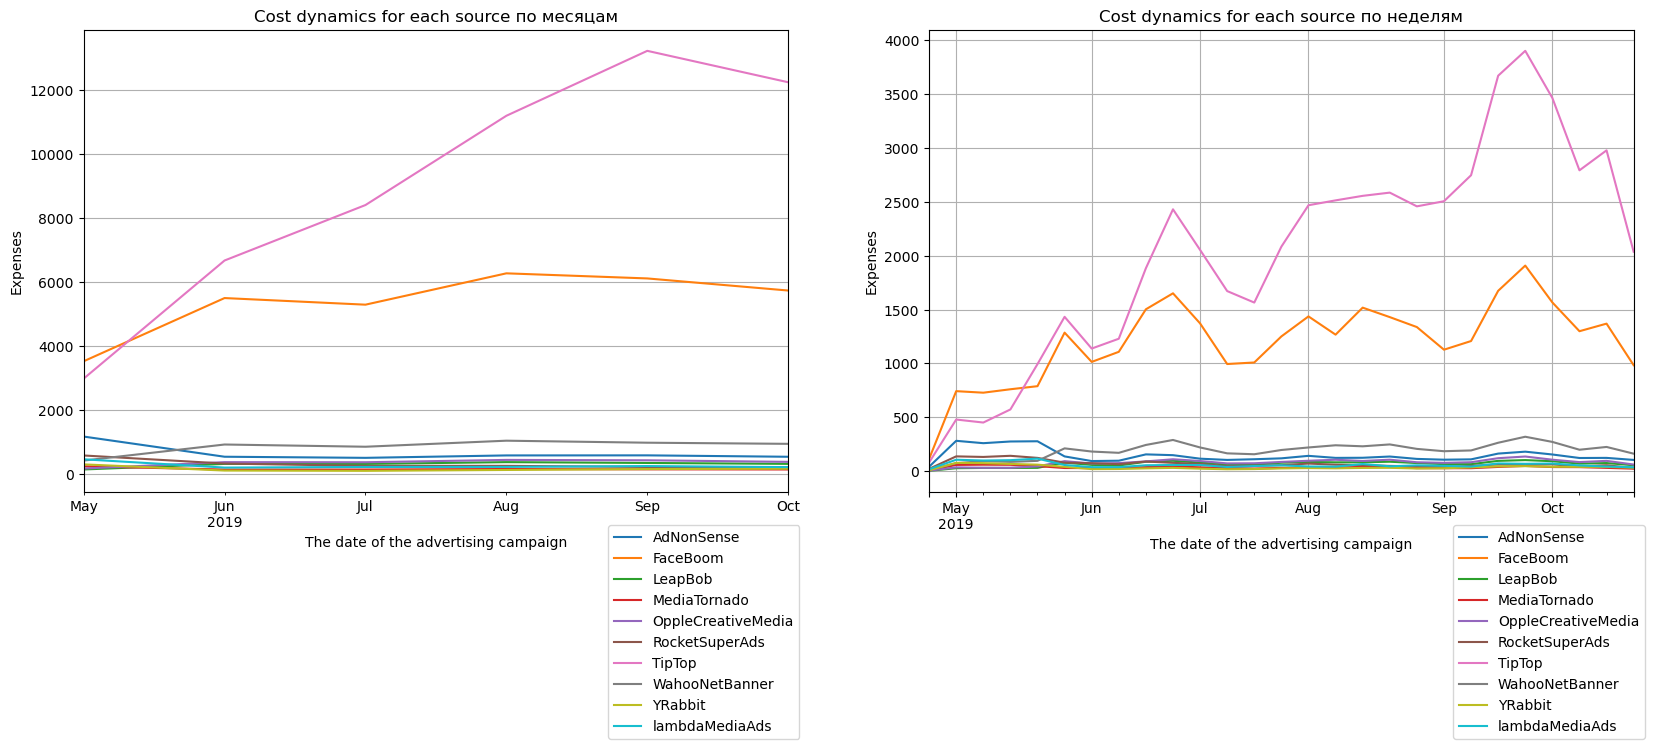

In [33]:
plt.figure(figsize=(20, 6))

columns = ['по месяцам', 'по неделям']
for i, col in enumerate(columns):
    costs.pivot_table(index=col, columns='channel', values='costs', aggfunc='sum').plot(
        grid=True,
        ax=plt.subplot(1, 2, i + 1)
    )
    plt.xlabel('The date of the advertising campaign')
    plt.ylabel('Expenses')
    plt.title('Cost dynamics for each source {}'.format(col))
    plt.legend(bbox_to_anchor =(0.88,-0.55), loc='lower center')
plt.show()


The charts show the main investments by sources: TipTop and FaceBoom starting around July. At the same time, as we have previously established, the spending on these channels began to increase.

Spending on TipTop started to significantly exceed FaceBoom around July. In general, the monthly expenses on TipTop increased from approximately 3,000 in May to about 13,000 in September, with a subsequent decrease in October.

Meanwhile, the spending on FaceBoom, although fluctuating over time, remains in the range of approximately 4,000-6,500 per month and 1,000-2,000 per week.

On the weekly chart, it is evident that the highest expenses often occur in the second half of the month. The 3rd week of September set a record for spending on both TipTop and FaceBoom.

#### Let's find out how much it cost on average to attract one user (CAC) from each source.

In [34]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [35]:
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).reset_index().sort_values('acquisition_cost', ascending=False)

,channel,acquisition_cost
6,TipTop,2.799003
1,FaceBoom,1.113286
0,AdNonSense,1.008054
9,lambdaMediaAds,0.724802
7,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
4,OppleCreativeMedia,0.250000
8,YRabbit,0.218975
3,MediaTornado,0.218717
2,LeapBob,0.210172


It costs the most to attract users from TipTop, where CAC = 2.8. At that time, another large source, FaceBoom, costs more than 2 times cheaper with CAC = 1.1.

### Advertising payback evaluation.

In [36]:
# Note that it is now November 1, 2019, and the business plan includes,
# that users should pay off no later than two weeks after the attraction.
# Let's set the appropriate values
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Let's exclude organic users from further analysis - we don't pay anything for them.

In [37]:
profiles = profiles.query('channel != "organic"').reset_index(drop=True)

#### Let's analyze the payback of advertising using graphs of TOPICS and ROI, as well as graphs of the dynamics of TOPICS, SVS and ROI.

In [38]:
# let's calculate LTV and ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

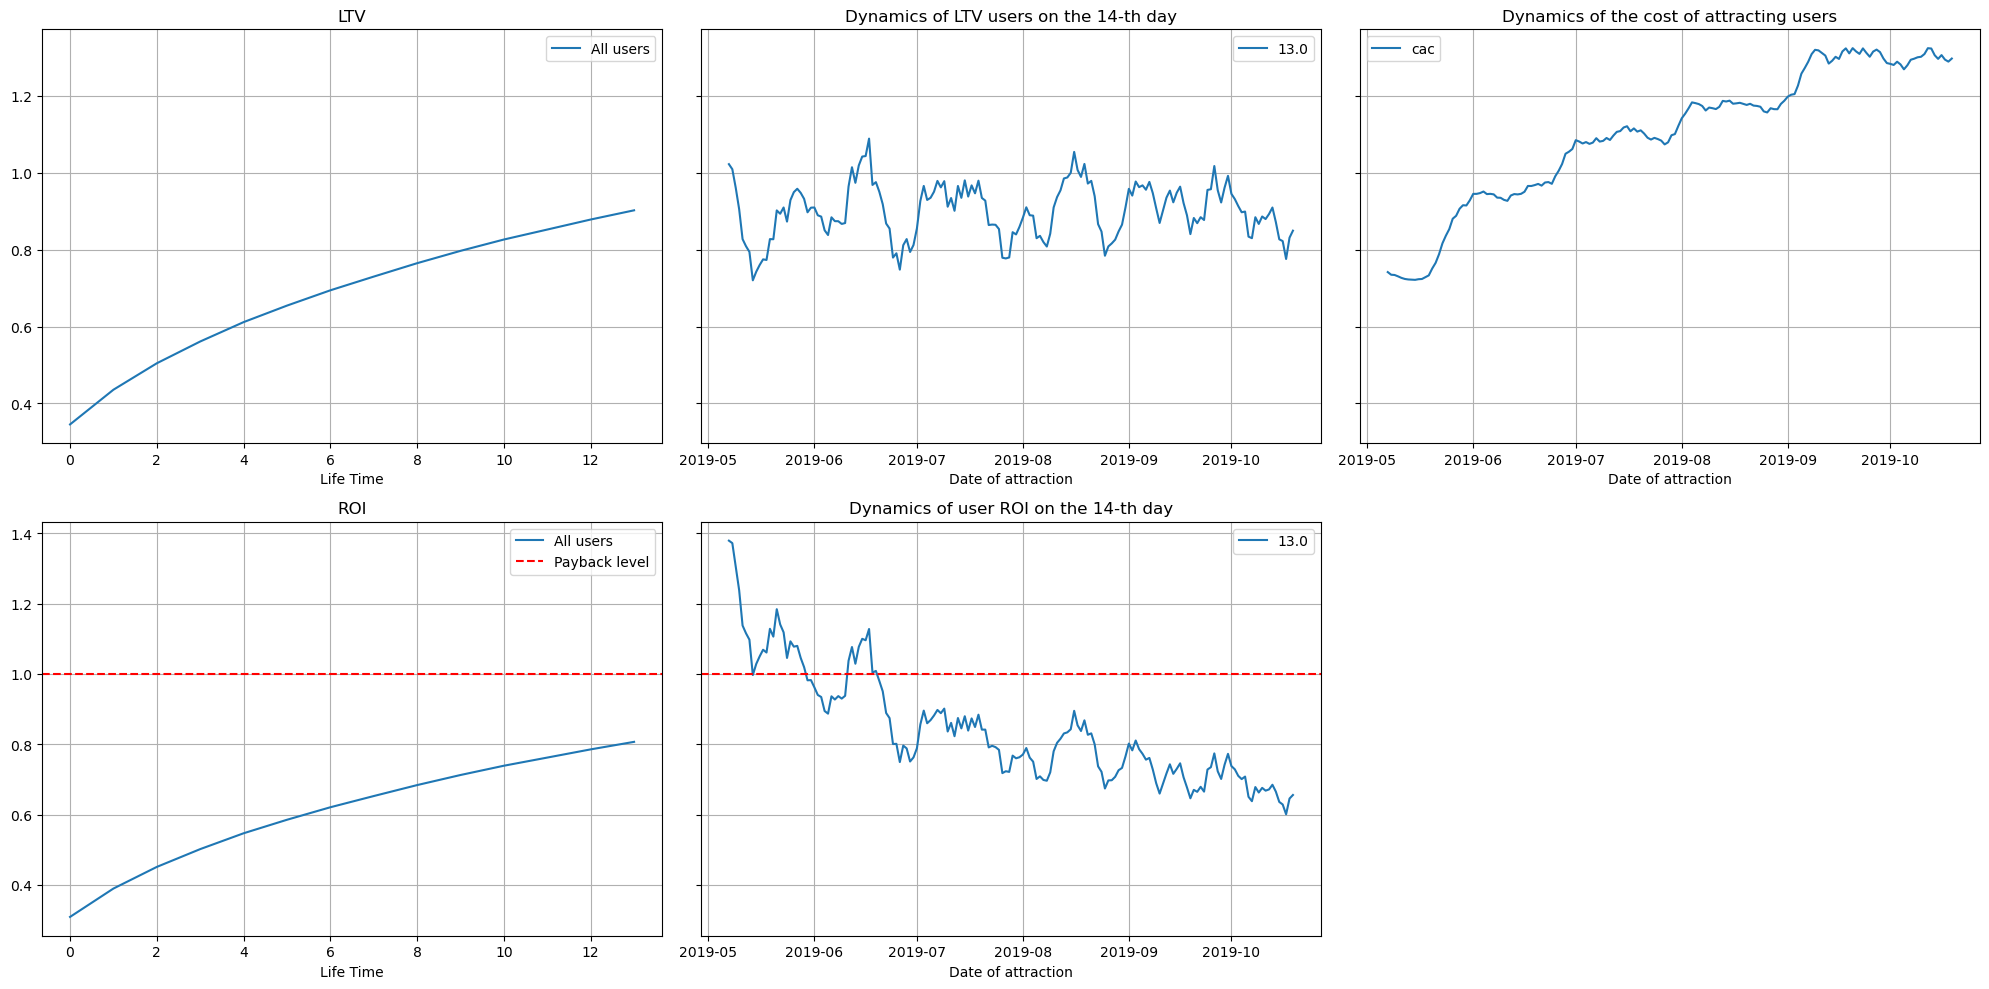

In [39]:
# let's build graphs
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Looking at the charts, the following conclusions can be made:

- The advertising is not paying off. ROI, although it approaches 100% by the end of the second week, never crosses that threshold.
- CAC sharply increased in July and continued its gradual rise until September, after which it shows an almost horizontal trend. This means that the advertising budget is constantly growing.
- LTV is influenced by the acquisition date: it declines towards the end of the month and shows spikes in the middle. However, despite the ups and downs, the indicator is fairly stable. We can conclude that the quality of users has not deteriorated.
- Since August, the return on investment has been consistently below 100% and shows an overall downward trend.
- ROI dropped sharply in June, and the lowest point coincides with a sharp increase in CAC.

#### Let's check the conversion rate and user retention, as well as the dynamics of their changes. Let's study the conversion and retention charts.

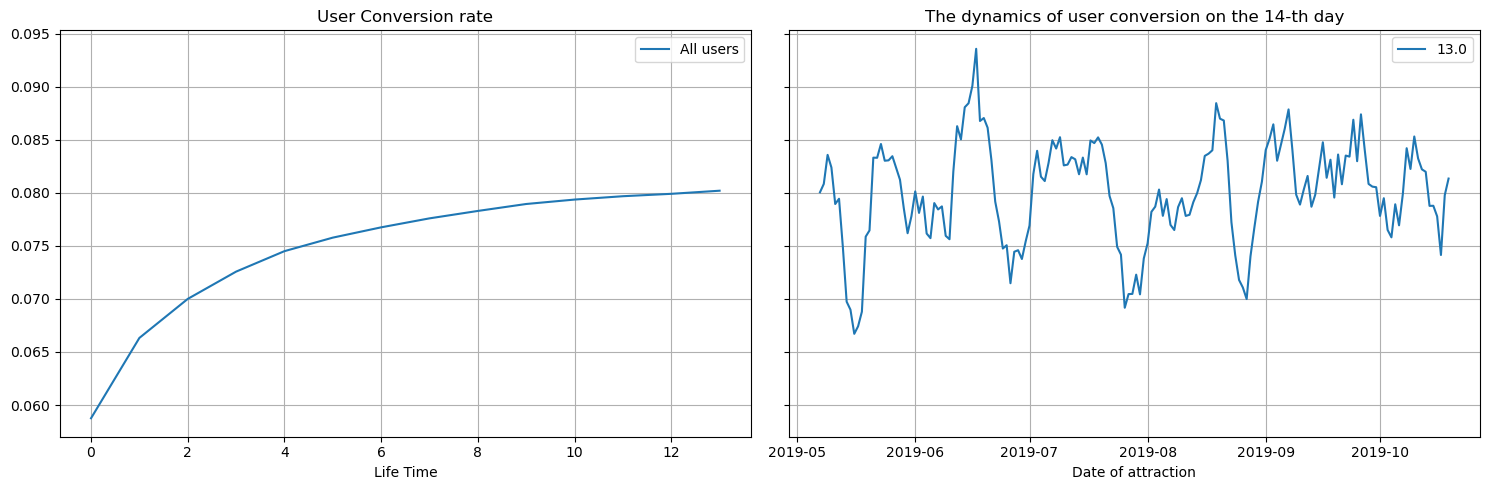

In [40]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Judging by the conversion schedule on the 14th day, the conversion rate increased in June, which coincides with an increase in CAC and a drop in ROI. It looks like an expensive advertising company has been launched, which has justified itself in terms of conversion.

Perhaps it's a matter of retention, let's build the appropriate graphs.

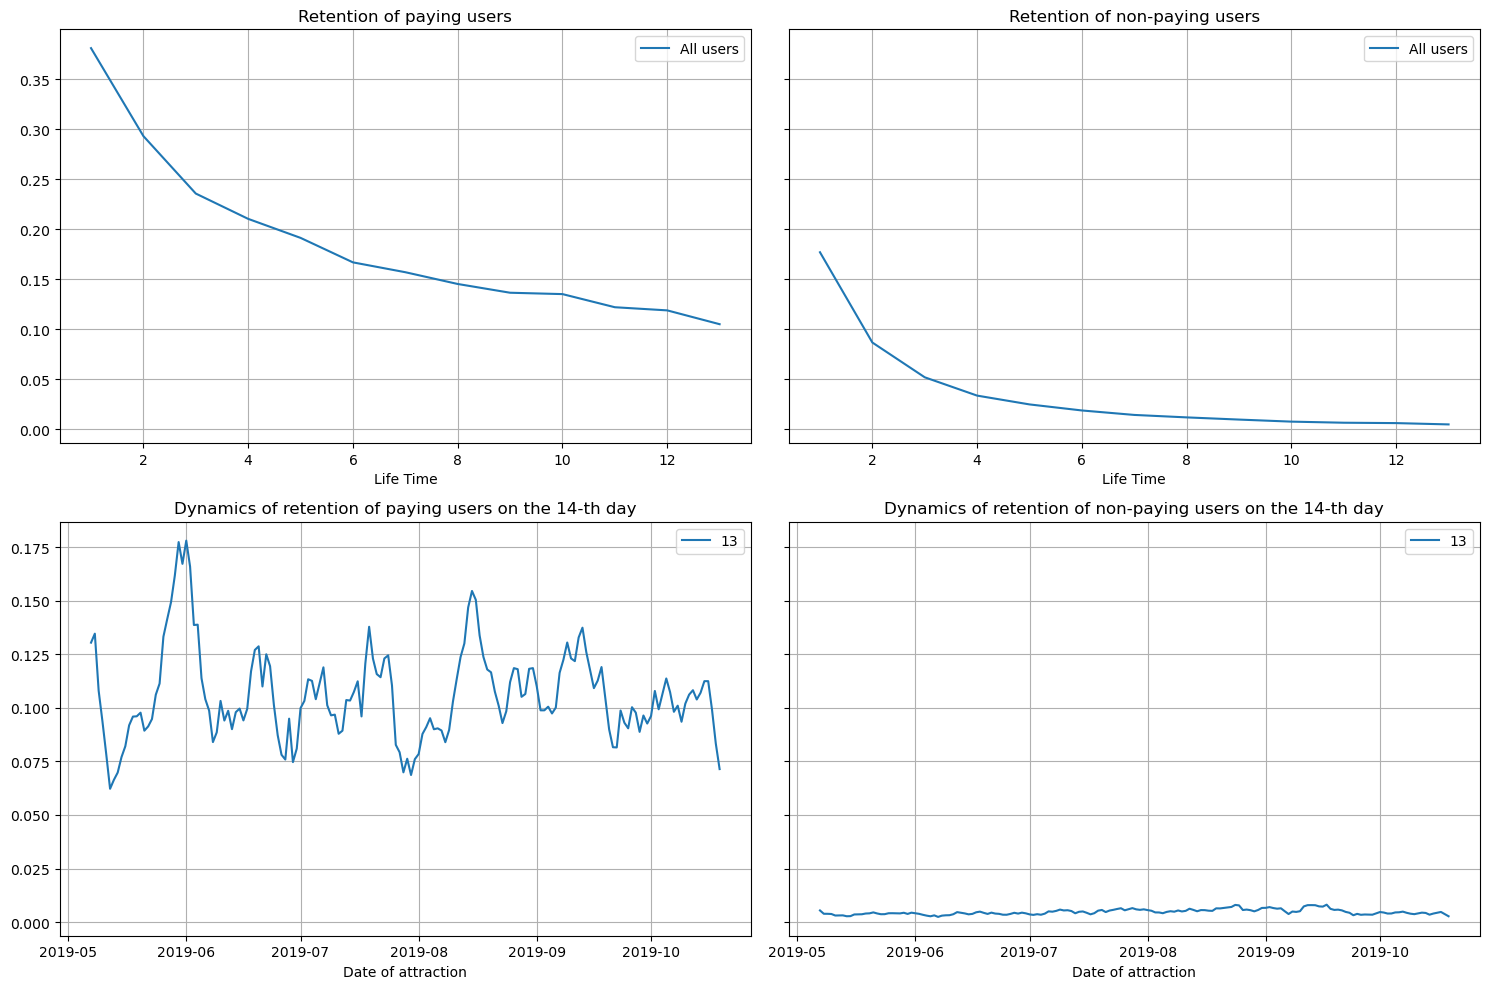

In [41]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

Retention is falling, but it is difficult to draw conclusions from the general data. It is necessary to analyze the behavior of LTV ROI CAC indicators broken down into sources of attraction, regions and used devices.

#### Let's analyze the payback of advertising by device.
Let's plot LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.

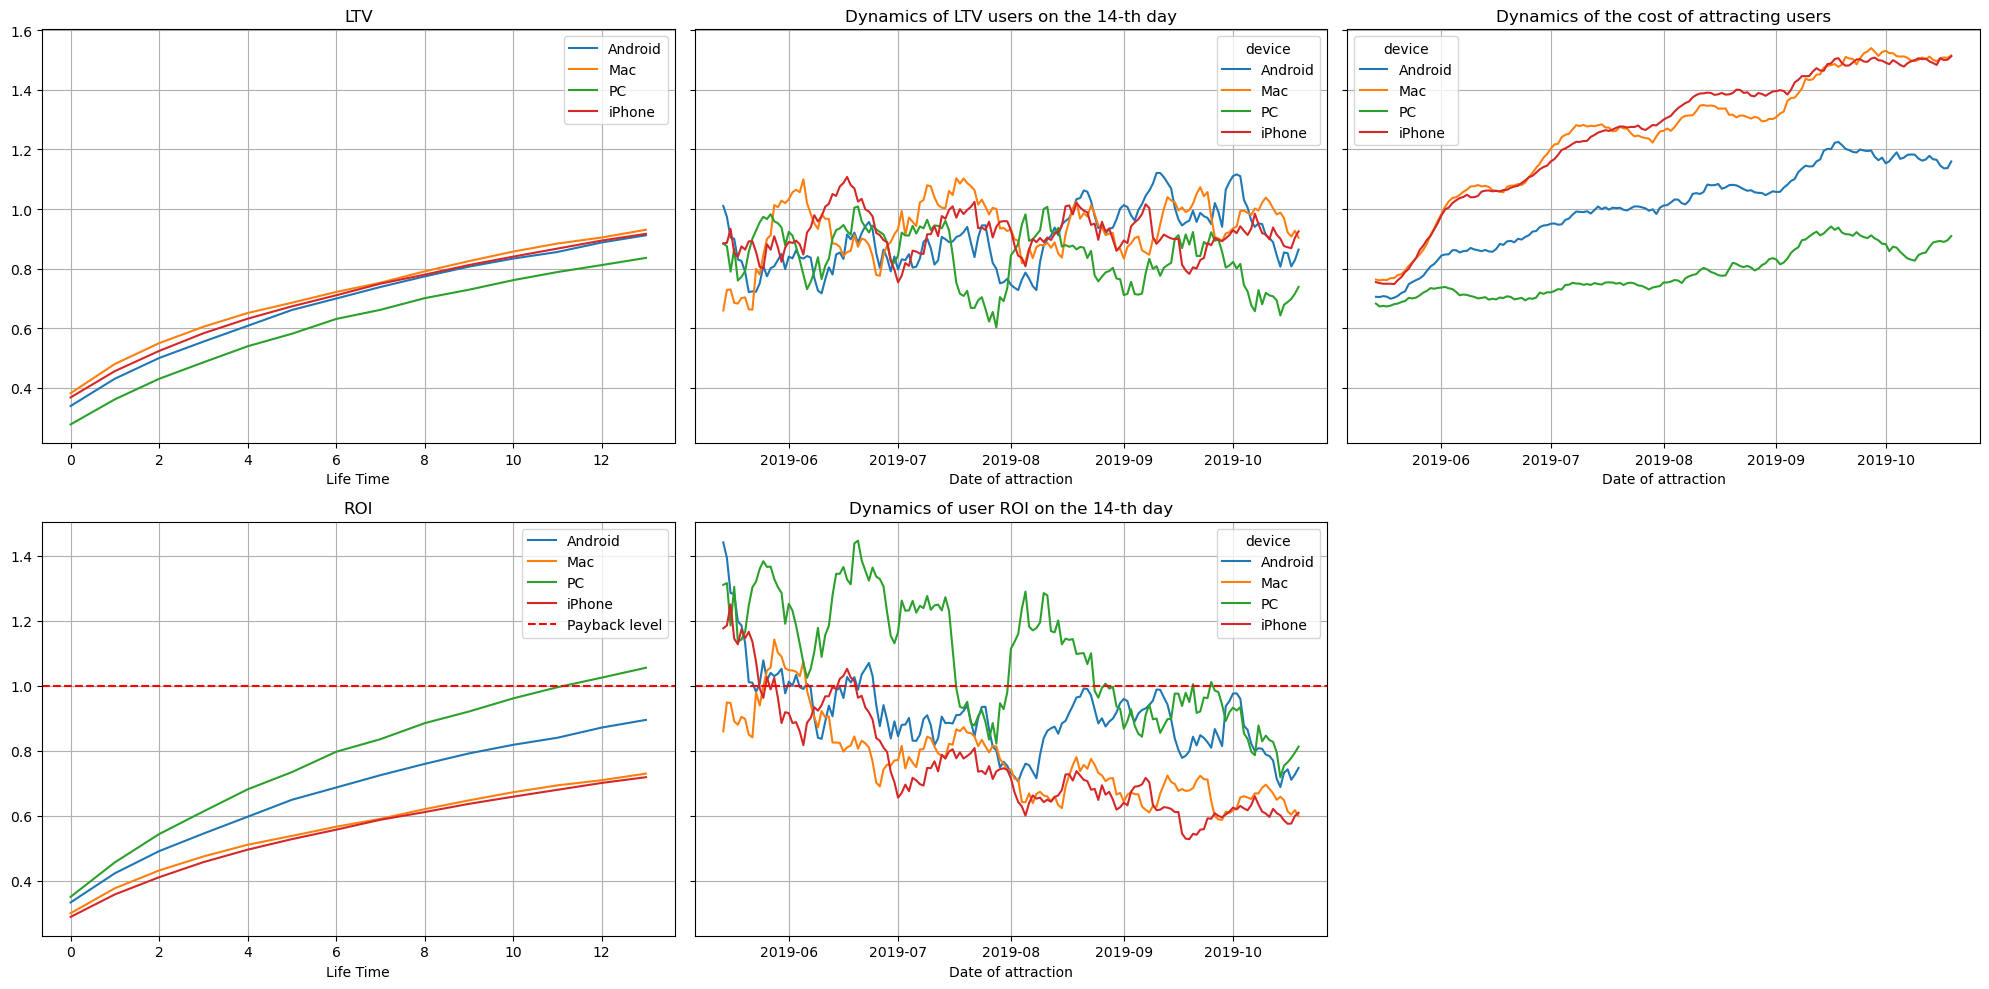

In [42]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

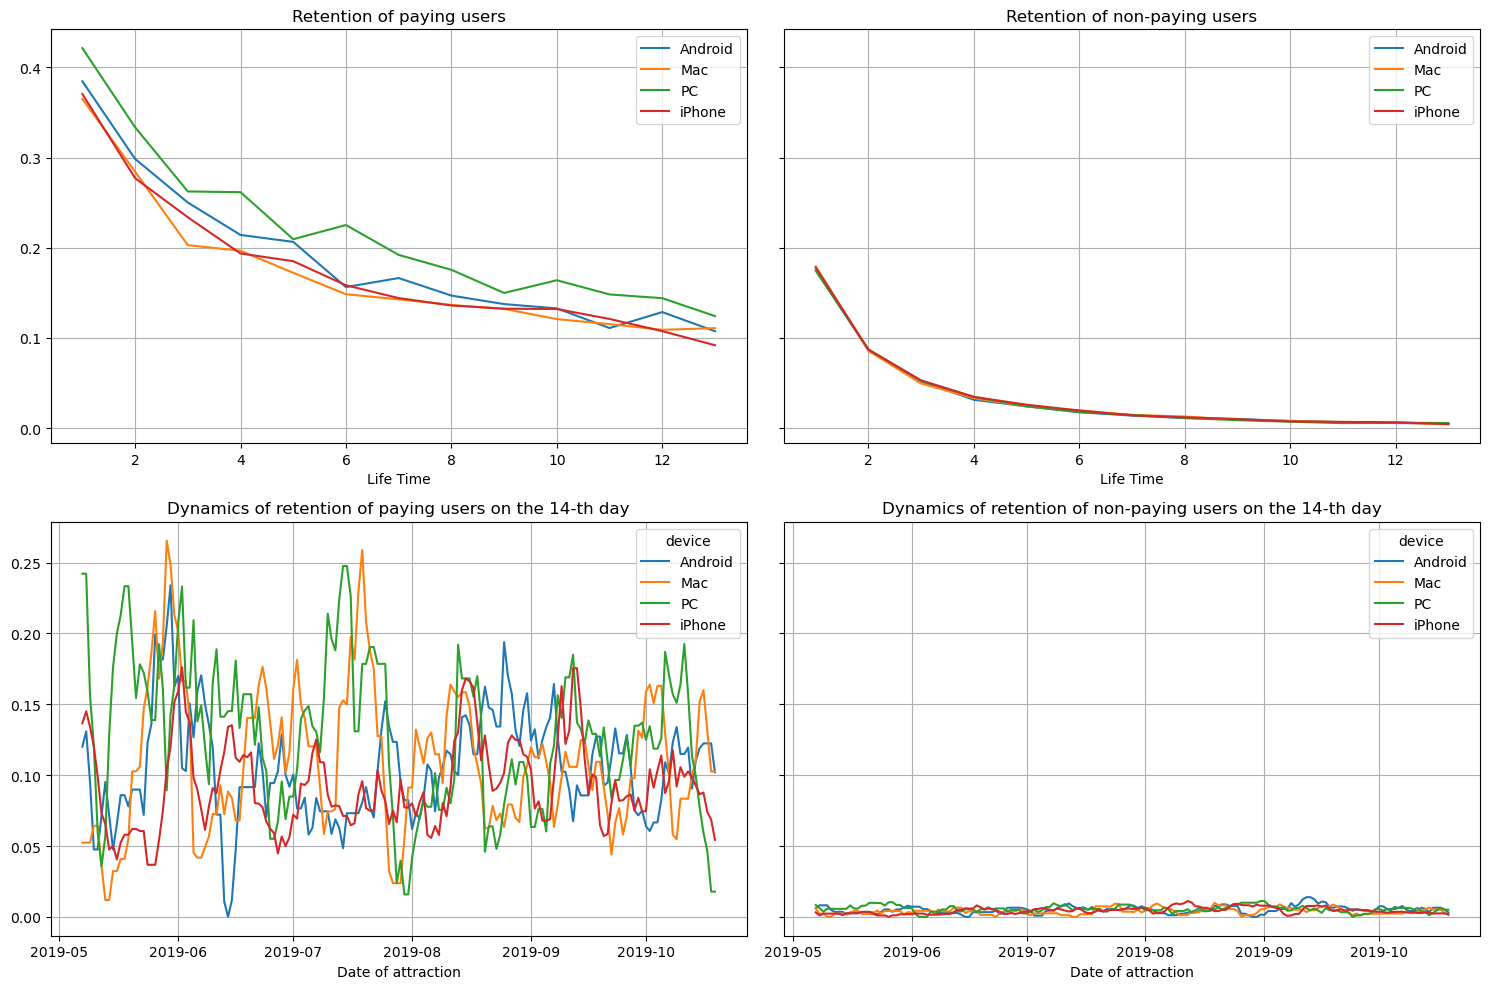

In [43]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

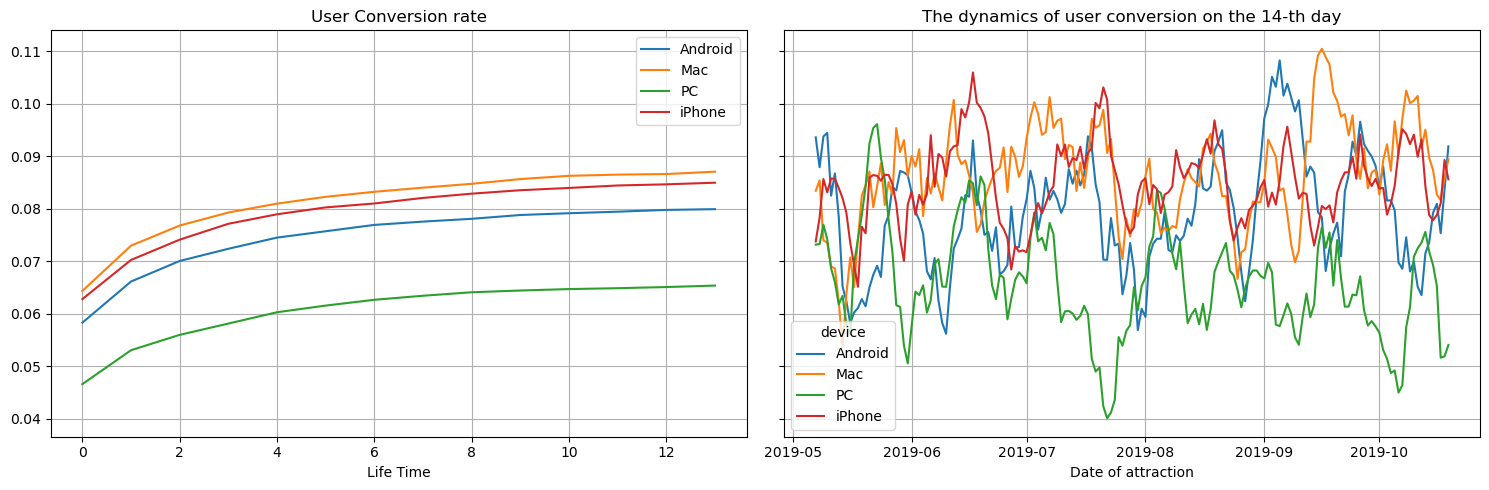

In [44]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

- On Mac and iPhone, advertising does not pay off.
- At the same time, user retention is similar across all devices, with the exception of a lower PC.
- Mac and iPhone conversion is better.

#### Let's analyze the payback of advertising by country.
Let's plot LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.


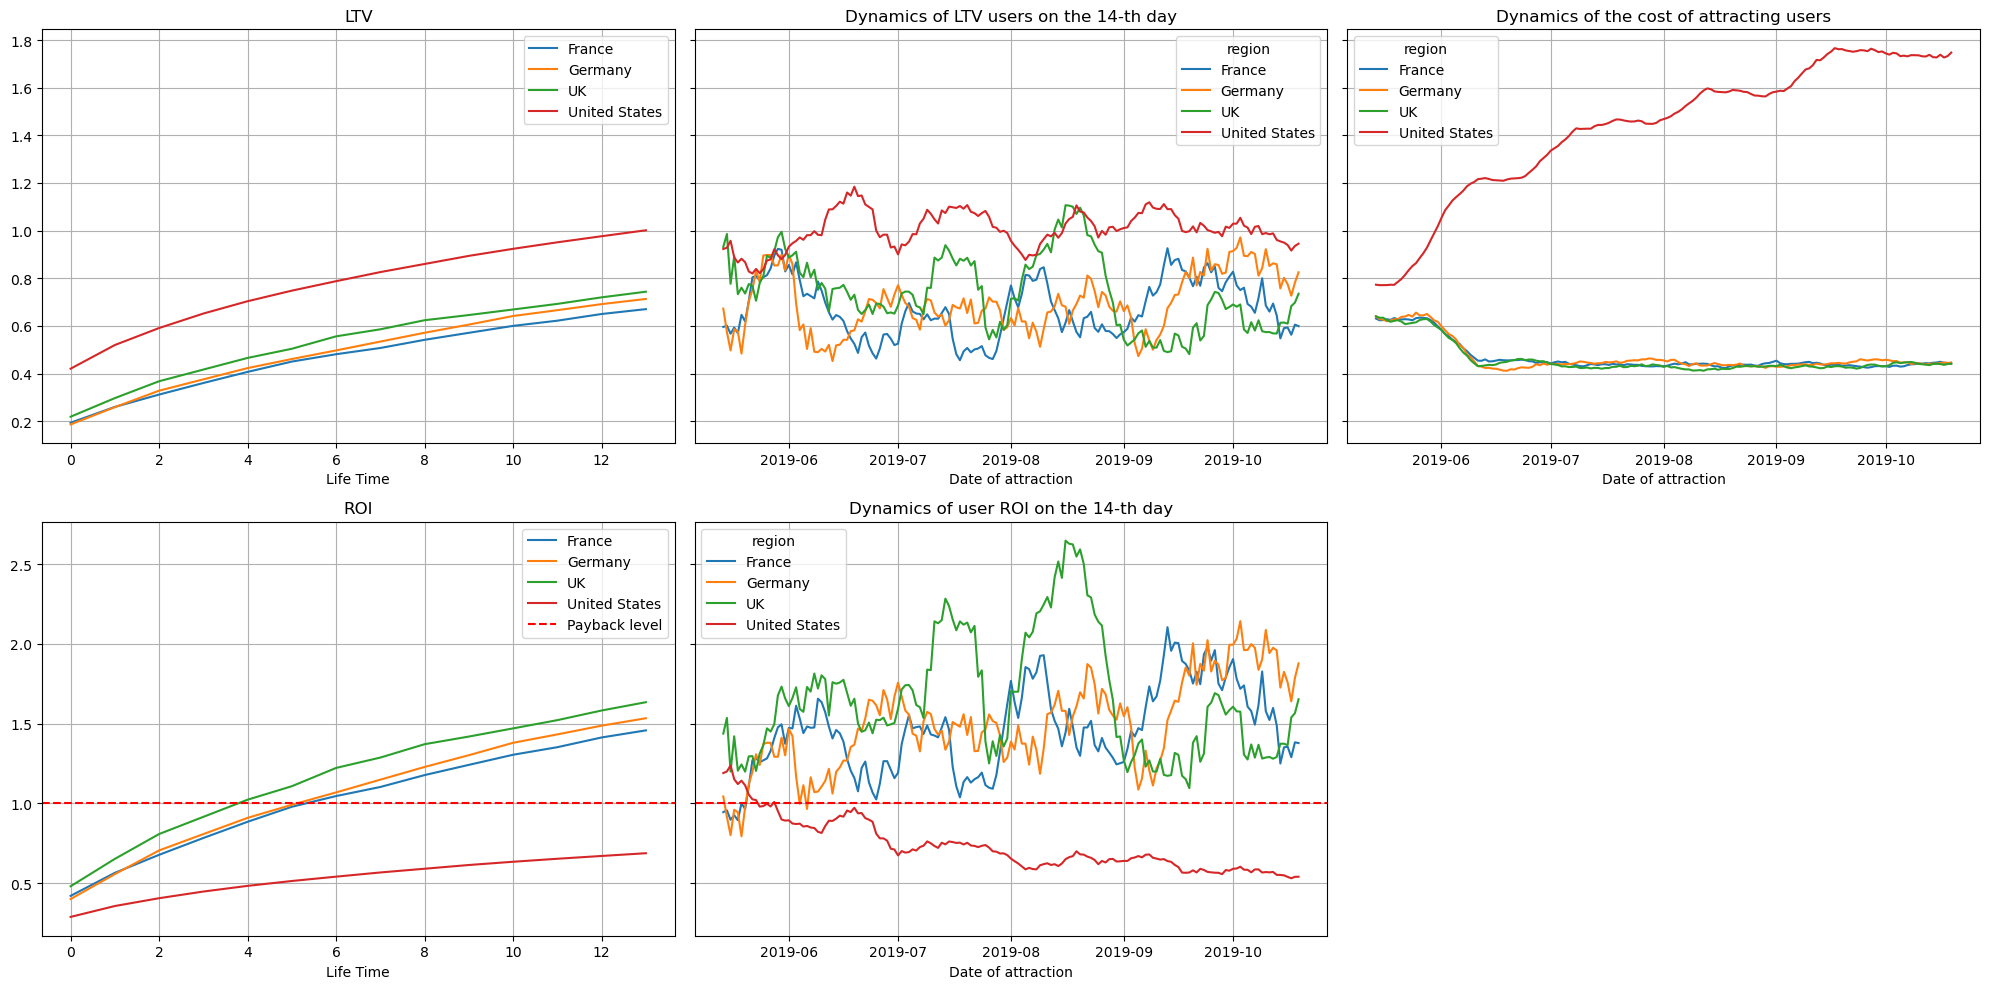

In [45]:
# look at the payback by country

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

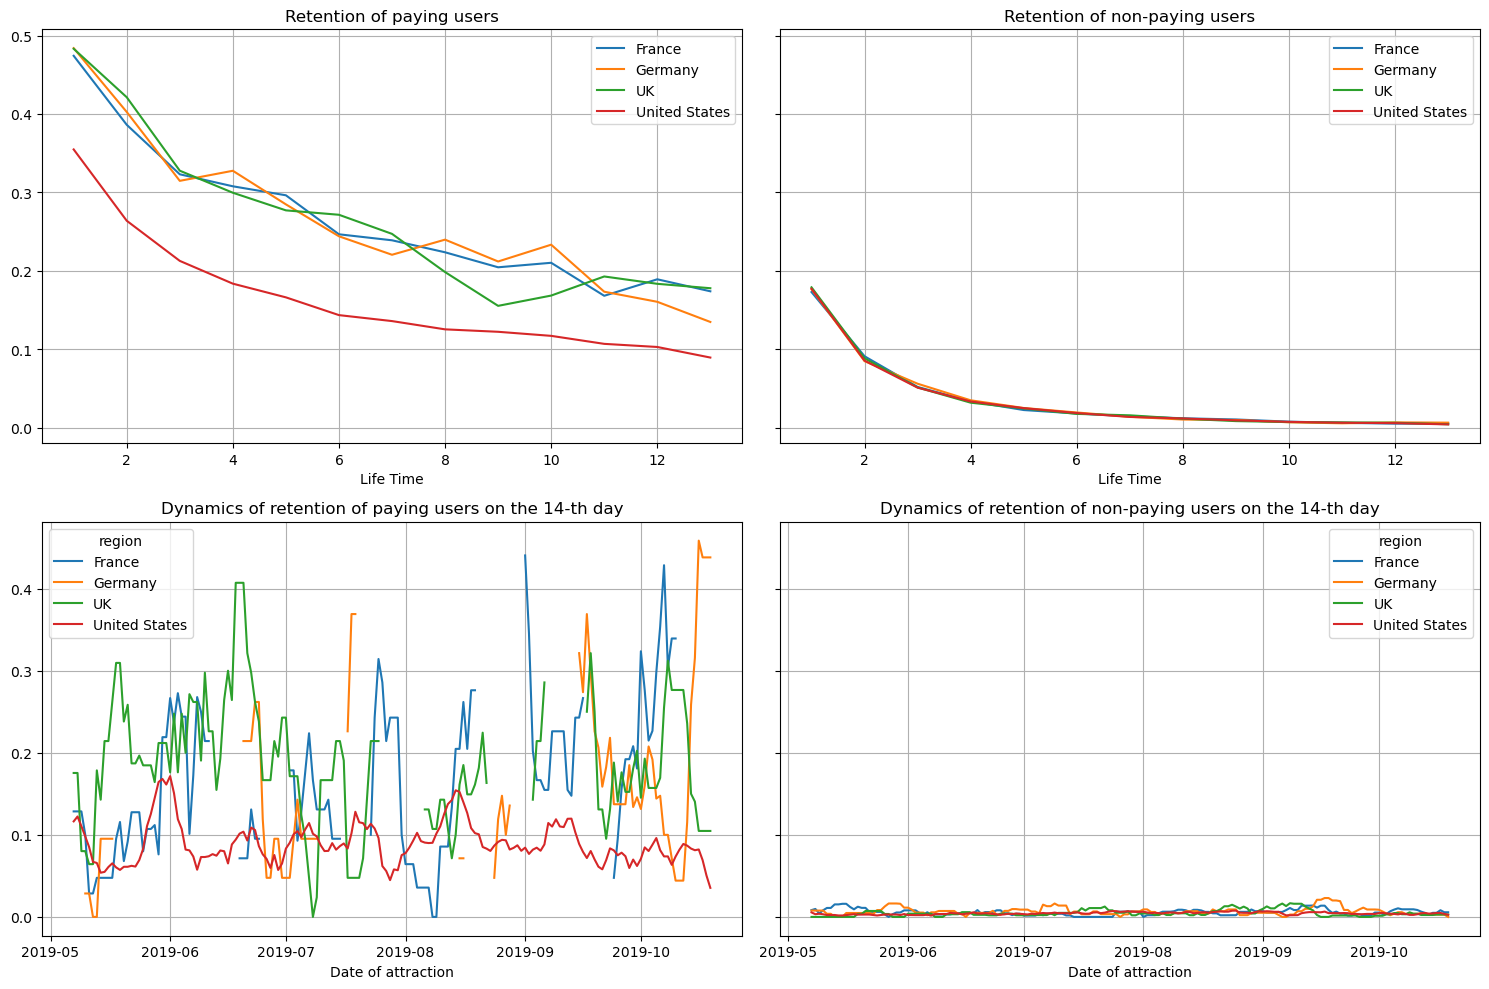

In [46]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

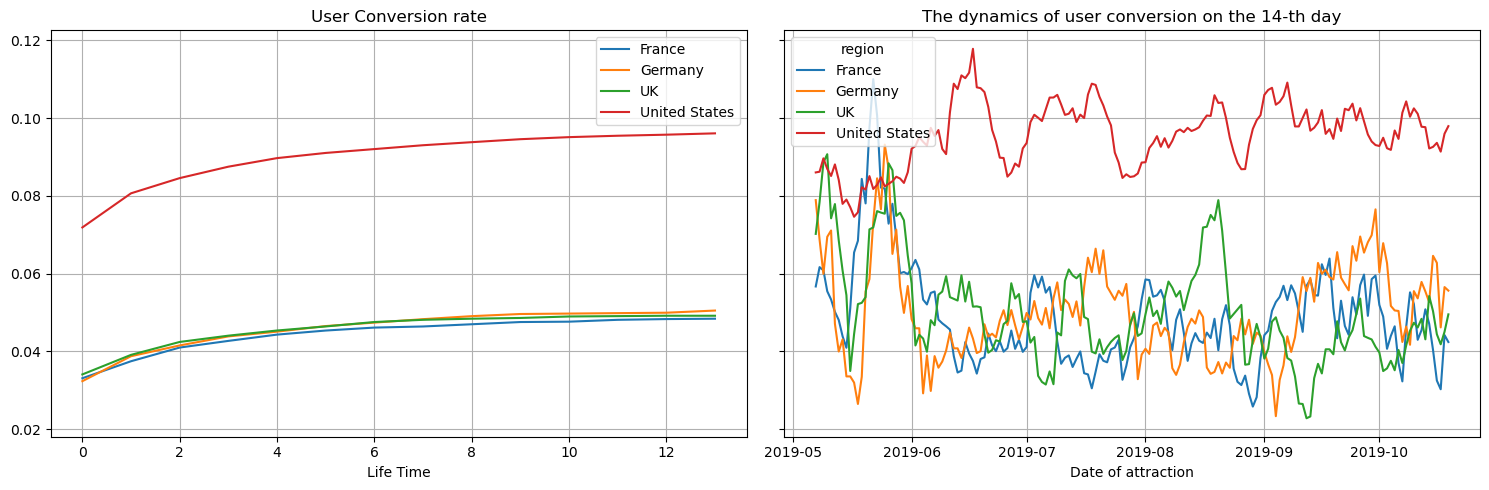

In [47]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

- Advertising pays off in all regions except the USA.
- At the same time, the retention of paying customers is lower than in other regions. HOWEVER, the conversion rate is higher than in other regions.

#### Let's analyze the payback of advertising by advertising channels.
Let's plot LTV and ROI graphs, as well as graphs of LTV, CAC and ROI dynamics.

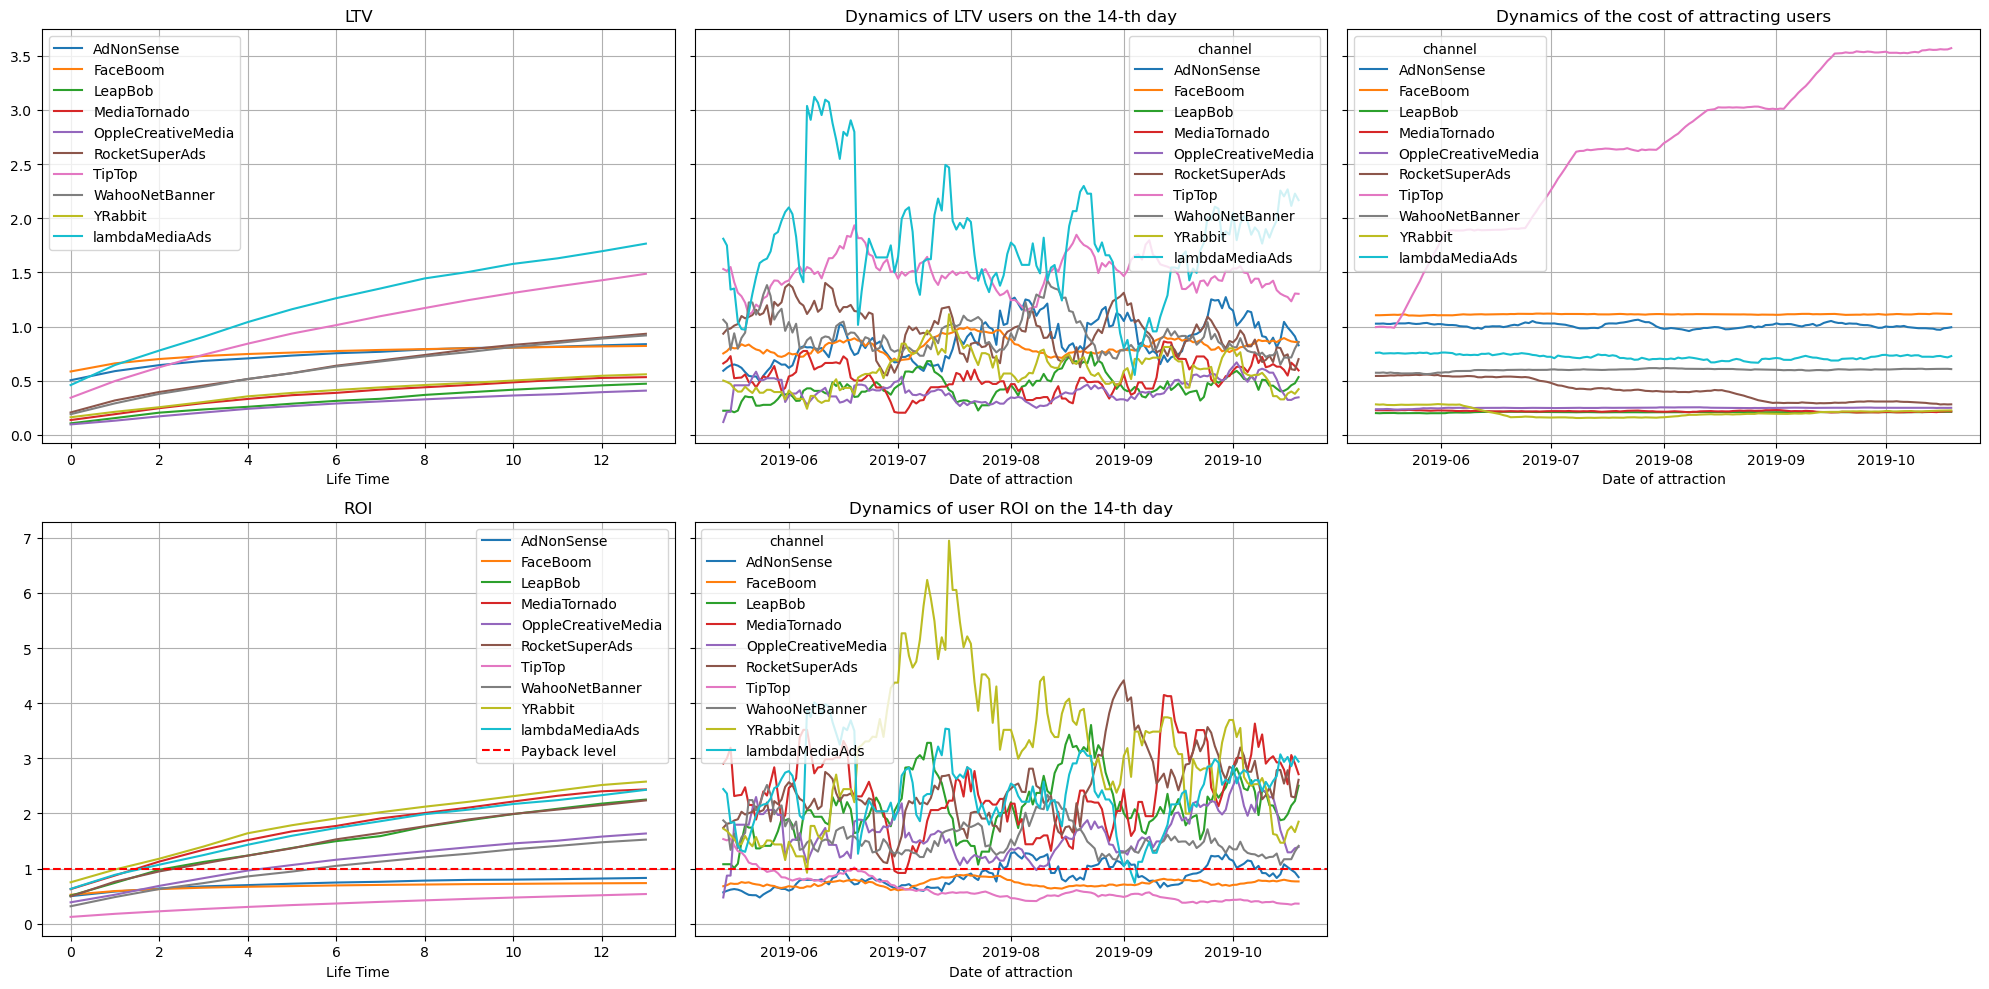

In [48]:
# let's look at the payback by source

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

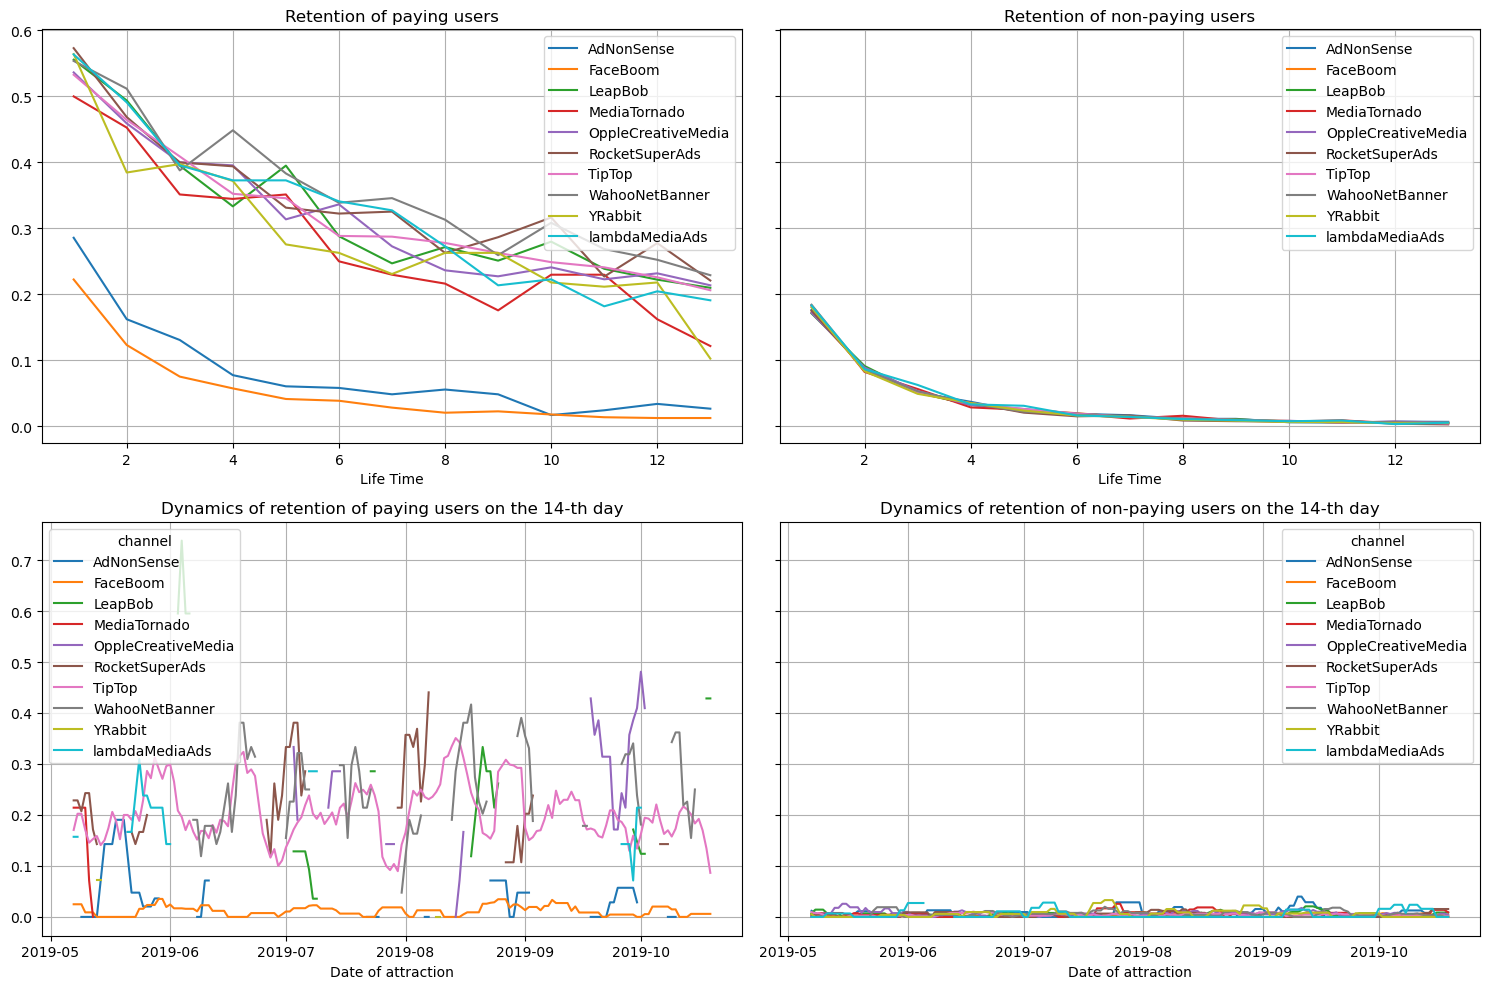

In [49]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

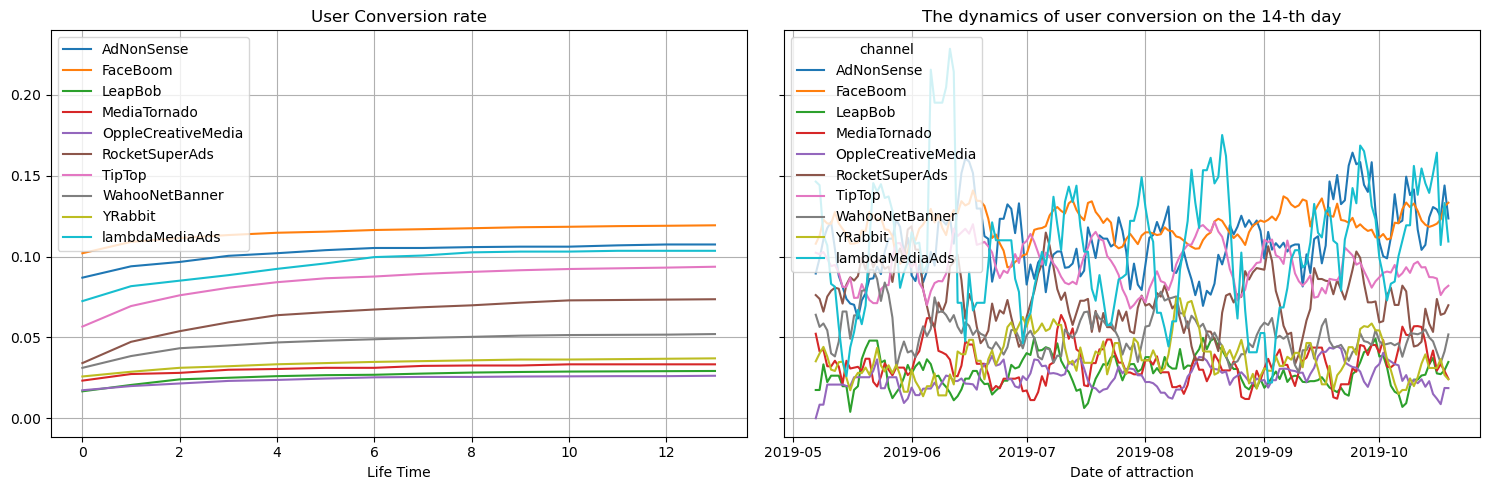

In [50]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

- Advertising through the main budgets in FaceBoom and TipTop is not paying off.
- The cost of acquisition through FaceBoom is stable, while it has been constantly increasing for TipTop since July.
- The retention rate of FaceBoom users is even lower than that of organic users, despite having the highest conversion rate among other acquisition channels.

In [51]:
# let's look at the distribution of budgets by channels of attraction grouped by country
profiles.groupby(['region', 'channel']).agg({'acquisition_cost': 'sum'})

acquisition_cost
region        channel                             
France        AdNonSense               1376.316788
              LeapBob                   628.045578
              OppleCreativeMedia        747.336327
              WahooNetBanner           1789.137006
              lambdaMediaAds            535.138248
Germany       AdNonSense               1229.282545
              LeapBob                   529.946557
              OppleCreativeMedia        640.733464
              WahooNetBanner           1552.972718
              lambdaMediaAds            471.287952
UK            AdNonSense               1305.650668
              LeapBob                   639.607864
              OppleCreativeMedia        763.180209
              WahooNetBanner           1808.890277
              lambdaMediaAds            551.173800
United States FaceBoom                32445.600000
              MediaTornado              954.480000
              RocketSuperAds           1833.000000
              TipTop                  54751.300000
              YRabbit                   944.220000

The main budgets are distributed on TipTop and FaceBoom in the USA, these sources are present only in this region.

**Summary**

- Overall, the advertising is not paying off.
- Users of Mac and iPhone devices, the USA as the acquisition region, and the advertising channels TipTop and FaceBoom may negatively impact advertising payback.
- The issues may be caused by low retention of paying customers.

Possible problem: attracting users in the USA through TipTop and FaceBoom with a focus on conversion, i.e., the first purchase, possibly with a discount or bonus, which increases advertising costs. Alternatively, the motivation of the source may be focused on acquisition rather than customer retention.

It is recommended to reassess the pricing policy and spending on advertising campaigns in the USA through TipTop and FaceBoom.

### Conclusions.

**Possible reasons for the inefficiency of user acquisition:**
- Low conversion rates of users from TipTop and FaceBoom sources in the USA.
- Increased advertising budget for TipTop.

**Recommendations for the marketing department:**
- Reassess the pricing policy with TipTop.
- Reconsider the reward structure for services with TipTop and FaceBoom in the USA, with a focus on customer retention.